<hr/>

# Introduction to Data Science


- Introduction to spectral embedding and spectral clustering

<hr/>

<h1><font color="darkblue">Spectral Methods</font></h1>

## Statistical Learning

- The methods in general fall in these 4 categories

>|                | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |

### Recap: Gaussian Mixture Model

Populating the interactive namespace from numpy and matplotlib


C:\Users\avitr\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


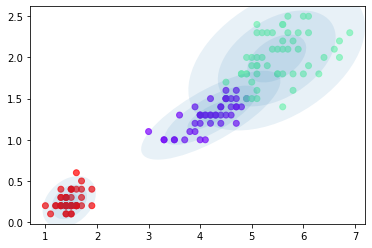

In [3]:
%pylab inline
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from matplotlib.patches import Ellipse

iris = datasets.load_iris()
X = iris.data[:,:]

gmm = GaussianMixture(n_components=3)
gmm.fit(X)
Cpred = gmm.predict(X)
fig = plt.figure()
ax = subplot(111)
scatter(X[:,2], X[:,3], c=Cpred, cmap=cm.rainbow, alpha=0.7)

for n in arange(gmm.n_components): 
    cov = gmm.covariances_[n][2:,2:] 
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,2:], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

### two major approaches in clustering:

- Compactness

> the points are closer to each other and are compact towards the cluster center

- Connectivity

> the points in a cluster are either immediately next to each other (epsilon distance) or connected

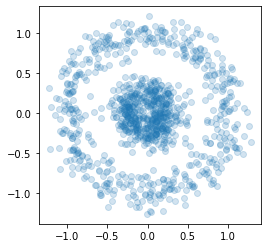

In [4]:
# Generate concentric classes
np.random.seed(45)
X,_ = datasets.make_circles(n_samples=1000,factor=0.25, noise=.12)
plt.subplot(111, aspect='equal'); 
plt.scatter(X[:,0], X[:,1], alpha=0.2);

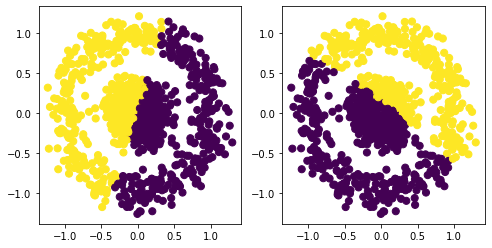

In [5]:
# k-means and GMM
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

figure(figsize=(8,4))
ax1 = plt.subplot(121)
labels = KMeans(n_clusters=2).fit_predict(X)
ax1.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')

ax2 = plt.subplot(122)
labels = GaussianMixture(n_components=2).fit_predict(X)
ax2.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')

plt.show()

#### Spectral clustering and embedding: unsupervised methods
- It treats each data point as a graph-node and thus transforms the clustering problem into a graph-partitioning problem. 


## Graph

<img src=https://momath.org/wp-content/uploads/2013/10/graph_theory-300x292.jpeg width=200px align=right>

- Represent connections between objects

> **Vertex**: a node of the graph <br>
> **Edge**: a link between two nodes 

- A graph consists of a set of vertices and a set of edges

>$ G\,(V,E) $



## Similarity Graph

- Connect similar objects in a dataset

> Measure of similarity on the edges


## Simple Implementation

In [6]:
class vert(object):
    def __init__(self, data=None):
        self.data = data

class edge(object):
    def __init__(self, A, B, w=1):
        self.A, self.B = A, B
        self.w = w

In [7]:
V = [ vert('zero'), vert('one'), vert('two'), 
      vert('three'), vert('four') ] 

E = [ edge(V[0],V[1]), edge(V[0],V[2]), edge(V[0],V[3]), 
      edge(V[1],V[3]),
      edge(V[2],V[3]), edge(V[2],V[4]), 
      edge(V[3],V[4]) ]

for edge in E: 
    print (edge.A.data, '\t--<%.1f>--\t' % edge.w, edge.B.data)

zero 	--<1.0>--	 one
zero 	--<1.0>--	 two
zero 	--<1.0>--	 three
one 	--<1.0>--	 three
two 	--<1.0>--	 three
two 	--<1.0>--	 four
three 	--<1.0>--	 four


- $\epsilon$ neighborhood graph: Each vertex is connected to vertices falling inside a ball of radius $\epsilon$ where $\epsilon$ is a real value that has to be tuned in order to catch the local structure of data.
    
- $k$-nearest neighbor graph: Each vertex is connected to its $k$-nearest neighbors where $k$ is an integer number which controls the local relationships of data.

- fully connected graph: Connect all points with positive similarity with each other, and weight all edges by $s_{ij}$, e.g. the radial basis function (rbf) kernel $s(x_i,x_j) = \exp \left(-{\frac {\|{x_i} -{x_j} \|^{2}}{2\sigma ^{2}}}\right)$

## Adjacency Matrix

- Are two vertices connected?

> Encode it in an $(n\!\times\!n)$ **matrix** $A$

- The matrix elements

>$ a_{ij} = \left\{ \begin{array}{ll}
         1 & \mbox{if $i$ and $j$ are connected}\\
         0 & \mbox{otherwise}\end{array} \right.  $
         
- Symmetric matrix
         

### For example

- The previous case becomes 

>$ A = \left( \begin{array}{ccc}
0 & 1 & 1 & 1 & 0  \\
1 & 0 & 0 & 1 & 0  \\
1 & 0 & 0 & 1 & 1  \\
1 & 1 & 1 & 0 & 1  \\
0 & 0 & 1 & 1 & 0  \\
\end{array} \right)$

## Spectral Clustering

- How to cut the graph into pieces with minimal "damage"

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Min_cut_example.svg/330px-Min_cut_example.svg.png align=left width=220>



## Graph Laplacian

- Degree matrix $D$ is diagonal matrix formed from the sum of all edges, i.e. the degree of a node/value of the diagonal is given by the number of edges connected to it.

>$\displaystyle d_{ii} = \sum_j^n a_{ij} $
>
>e.g. for the previous case
>
>$ D = \left( \begin{array}{ccc}
3 & 0 & 0 & 0 & 0  \\
0 & 2 & 0 & 0 & 0  \\
0 & 0 & 3 & 0 & 0  \\
0 & 0 & 0 & 4 & 0  \\
0 & 0 & 0 & 0 & 2  \\
\end{array} \right)$

- The **graph Laplacian**, another representation of the graph/data points

>$ L = D - A$

- What's so special abou this?!

## An Interesting Property

- For any $x \in \mathbb{R}^n$, the bilinear expression $x^T L\,x $ has a familiar formula

>$\displaystyle x^T L\,x = \sum_{i}^n d_{ii} x_i^2 - \sum_{i,j}^n  a_{ij}\,x_i x_j $
> <br><br>
>$\displaystyle \hspace{0.5in} = \frac{1}{2} \left\{ \sum_{i}^n d_{ii} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{j}^n d_{jj} x_j^2 \right\}$
> <br><br>
>$\displaystyle  \hspace{0.5in} = \frac{1}{2} \left\{ \sum_{i,j}^n a_{ij} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{i,j}^n a_{ij} x_j^2 \right\}$
> <br><br>
>$\displaystyle  \hspace{0.5in} = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 $


- Which is


>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} (x_i\!-\!x_j)^2$

## Minimization

- Solution: the smallest eigenvalues of $L$ and corresponding eigenvectors

> The 1st eigenvector is the trivial solution <br>
> We use the 2nd eigenvector, and so on...

<img src=https://miro.medium.com/max/1400/1*p2vrLlFxdJgGZxCGO5WBmA.gif align=left width=600>

> Spectral Gap: The first non-zero eigenvalue is called the Spectral Gap. The Spectral Gap gives us some notion of the density of the graph.
>
> Fiedler Value: The second eigenvalue is called the Fiedler Value, and the corresponding vector is the Fiedler vector. Each value in the Fiedler vector gives us information as to which side of the decision boundary a particular node belongs to.
>
> Using L, we find the first large gap between eigen values which generally indicates that the number of eigenvalues before this gap is equal to the number of clusters.

- Laplacian eigenmaps

> Different similarity matrices to start with<br>
> Different normalizations

## Weighted Edges

- Instead of $A$ we can use a weight matrix $W$

>$ L = D - W$ 
> <br><br>
> where $D$ has diagonal elements
> <br><br>
>$\displaystyle d_{ii} = \sum_j w_{ij}$

- And the result is again 

>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n w_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} w_{ij}\,(x_i\!-\!x_j)^2$

## Variants

- Simple Laplacian
 
>$ L = D-W$
 
- Normalized Laplacian
 
>$ L_N = D^{-1/2}\,L\,D^{-1/2} = I -  D^{-1/2}\,W\,D^{-1/2}$
 
- Relaxed Laplacian
 
>$ L_{\rho} = L - \rho D$
 
- Beltrami, etc...

## Demo from Scratch

1. Simulated dataset with blobs in 2-D
1. Build the adjacency matrix based on a distance threshold: $d_{ij}=\sqrt{(x_i\!-\!x_j)^2 + (y_i\!-\!y_j)^2} < d_T$
1. Calculate the $D$ degree matrix
1. Calculate the $L$ graph Laplacian
1. Solve the eigenproblem of $L$
1. Study the eigenvalues and eigenvectors

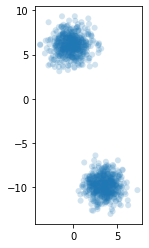

In [8]:
from sklearn import datasets
import random
random.seed(3)

X,_ = datasets.make_blobs(n_samples=1000, centers=2, cluster_std=1.1)

figure(); subplot(111,aspect='equal'); 
scatter(X[:,0], X[:,1], alpha=0.2, edgecolor='none');

In [9]:
# Reshape data for broadcasting
m1 = X[np.newaxis, :, :]
m2 = X[:, np.newaxis, :]
print (X.shape)
print (m1.shape)
print (m2.shape)

(1000, 2)
(1, 1000, 2)
(1000, 1, 2)


In [10]:
# Pairwise distances
r = m1 - m2
print (r.shape)
r *= r 
d2 = r.sum(axis=2)
print (d2.shape)

(1000, 1000, 2)
(1000, 1000)


Symmetric? True


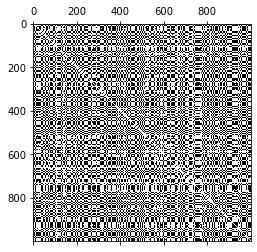

In [11]:
# adjacency matrix
A = (d2<9)
fill_diagonal(A,False)
A = A.astype(float)
print ('Symmetric?', np.allclose(A,A.T) )
spy(A);

8.732976993893373e-14 1.2580646321207366e-13 (1000,) (1000, 1000)


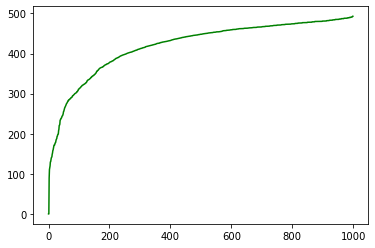

In [12]:
dd = A.sum(axis=0)
D = diag(dd)

L = D - A

w, v = linalg.eigh(L)

print (w[0], w[1], w.shape, v.shape)
plot(w,'g');

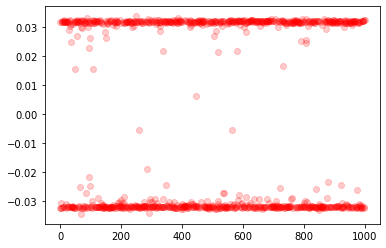

In [11]:
plot(v[:,1], 'or', alpha=0.2);

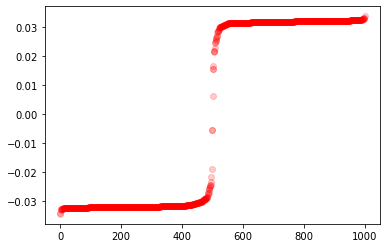

In [12]:
s = argsort(v[:,1])
plot(v[s,1], 'ro', alpha=0.2);

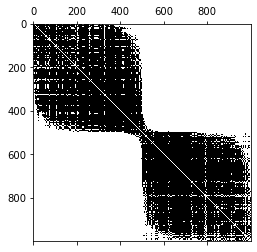

In [13]:
i,j = meshgrid(s,s)
spy(A[i,j]);

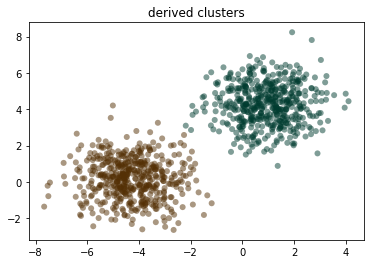

In [14]:
labels = (v[:,1] < 0)
scatter(X[:,0], X[:,1], c=labels, cmap=cm.BrBG, alpha=0.5, edgecolor='none'); title('derived clusters');

### Example in Matlab

If interested, also check out the Matlab code and documentation at <br>
https://www.cs.purdue.edu/homes/dgleich/demos/matlab/spectral/spectral.html

### Exercise

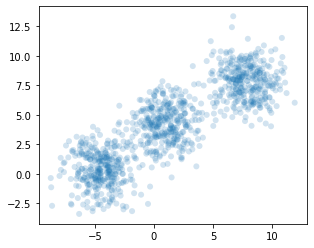

In [15]:
np.random.seed(3) 
X,_ = datasets.make_blobs(n_samples=1000, centers=3, cluster_std=1.5)
np.savetxt("files/Class-Blobs.csv", X, delimiter=",")

figure(); subplot(111,aspect='equal'); 
scatter(X[:,0], X[:,1], alpha=0.2, edgecolor='none');
del X

In [16]:
X = loadtxt('files/Class-Blobs.csv', delimiter=',')
X.shape

(1000, 2)

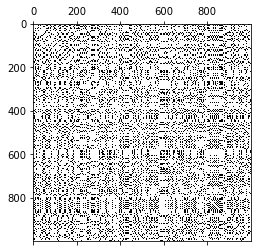

In [17]:
d2 = np.square(X[newaxis,:,:]-X[:,newaxis,:]).sum(axis=2)
A = (d2<9).astype(float)
np.fill_diagonal(A,0)
spy(A);

4.876931047113258e-14 1.8248789677316406 (1000,) (1000, 1000)


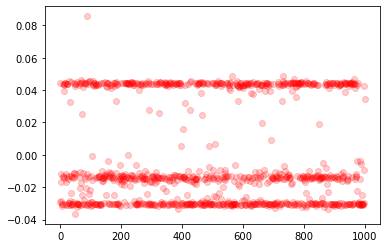

In [18]:
dd = A.sum(axis=0)
D = diag(dd)
L = D - A
w, v = linalg.eigh(L)

print (w[0], w[1], w.shape, v.shape)
plot(v[:,1], 'or', alpha=0.2);

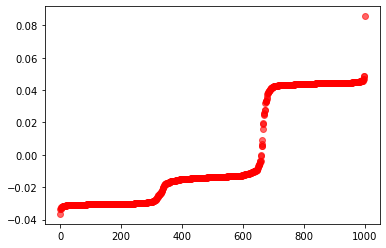

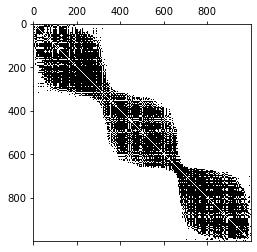

In [19]:
s = argsort(v[:,1])
plot(v[s,1], 'ro', alpha=0.6);
i,j = meshgrid(s,s)
figure(); spy(A[i,j]);

- Compute the first k eigenvectors $v_1,…,v_k$ of L.
- Let $V \in \mathbb{R}^{n \times k}$ be the matrix containing the vectors $v_1,…,v_k$ as columns.
- For $i = 1,…,n$, let $y_i \in \mathbb{R}^k$ be the vector corresponding to the i-th row of $V$.
- Cluster the points $\{y_i\}_{i=1}^n$ in $k$ with the k-means algorithm into clusters $C_1,…,C_k$.

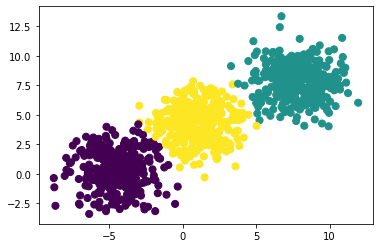

In [20]:
labels = KMeans(n_clusters=3).fit_predict(v[:,:2])
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')
plt.show()

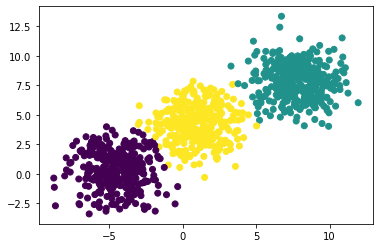

In [21]:
from sklearn.cluster import SpectralClustering

sc=SpectralClustering(n_clusters=3).fit(X)

labels = sc.labels_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

In [22]:
vars(sc)

{'n_clusters': 3,
 'eigen_solver': None,
 'n_components': None,
 'random_state': None,
 'n_init': 10,
 'gamma': 1.0,
 'affinity': 'rbf',
 'n_neighbors': 10,
 'eigen_tol': 0.0,
 'assign_labels': 'kmeans',
 'degree': 3,
 'coef0': 1,
 'kernel_params': None,
 'n_jobs': None,
 'verbose': False,
 'n_features_in_': 2,
 'affinity_matrix_': array([[1.00000000e+00, 6.39749573e-84, 3.15597385e-80, ...,
         2.29936112e-04, 6.79817451e-21, 1.53597951e-08],
        [6.39749573e-84, 1.00000000e+00, 7.29456309e-01, ...,
         3.24003883e-58, 2.23150589e-24, 1.54029654e-44],
        [3.15597385e-80, 7.29456309e-01, 1.00000000e+00, ...,
         8.00219026e-56, 6.89942569e-22, 2.75166020e-41],
        ...,
        [2.29936112e-04, 3.24003883e-58, 8.00219026e-56, ...,
         1.00000000e+00, 1.33549078e-12, 5.02094797e-06],
        [6.79817451e-21, 2.23150589e-24, 6.89942569e-22, ...,
         1.33549078e-12, 1.00000000e+00, 6.64566241e-04],
        [1.53597951e-08, 1.54029654e-44, 2.75166020e-4

### Unhomework

- Cluster the point set below using the spectral method

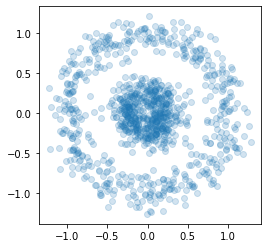

In [23]:
np.random.seed(45)
X,_ = datasets.make_circles(n_samples=1000,factor=0.25, noise=.12)

subplot(111,aspect='equal'); scatter(X[:,0],X[:,1], alpha=0.2);

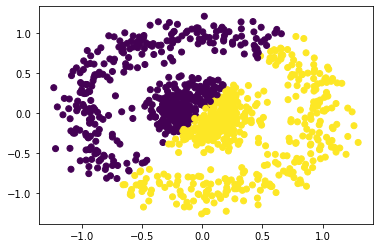

In [24]:
sc=SpectralClustering(n_clusters=2).fit(X) # tuning the parameters of "SpectralClustering", like "affinity", to get good result

labels = sc.labels_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()